
Статистика по датасету:

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.4999

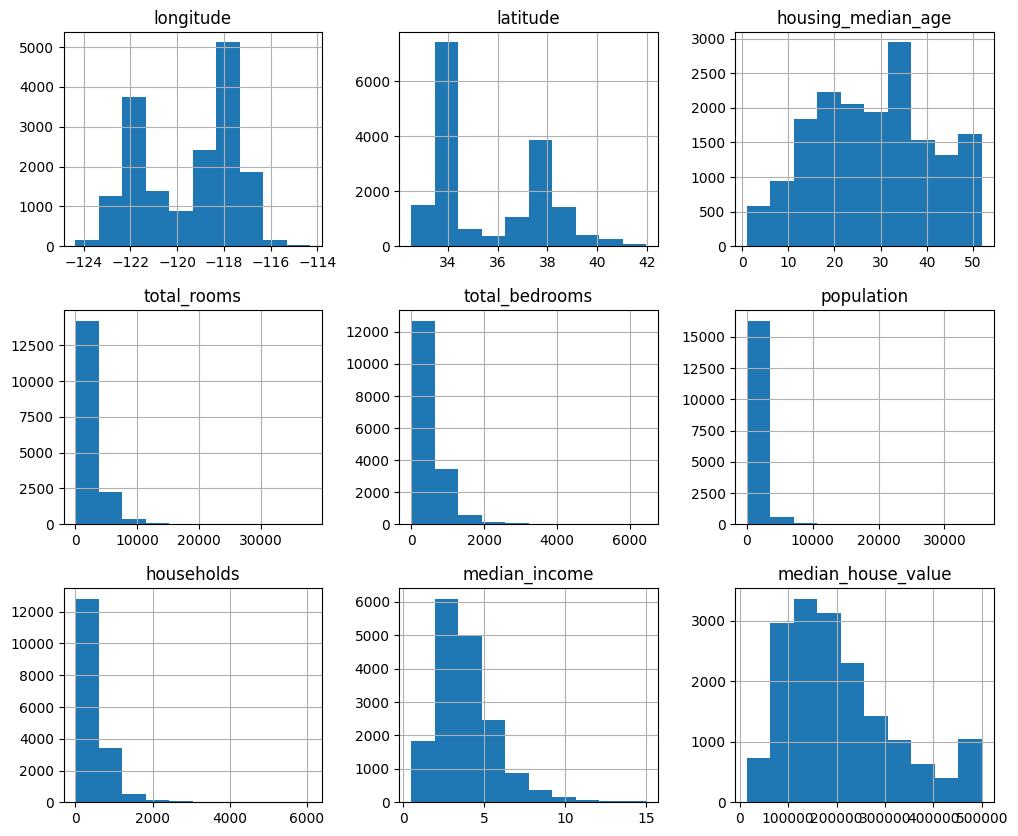


Модель 1 с признаками: ['median_income']
Коэффициент детерминации (R^2): 0.4978

Модель 2 с признаками: ['total_rooms', 'total_bedrooms', 'households']
Коэффициент детерминации (R^2): 0.0681

Модель 3 с признаками: ['latitude', 'longitude', 'housing_median_age', 'population']
Коэффициент детерминации (R^2): 0.2455


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_data():
    data = pd.read_csv("california_housing_train.csv")  # Замените на путь к вашему файлу
    return data

def explore_data(data):
    print("\nСтатистика по датасету:\n")
    print(data.describe())
    data.hist(figsize=(12, 10))
    plt.show()

def preprocess_data(data):
    # Обработка пропущенных значений
    data.fillna(data.median(), inplace=True)

    # Нормализация числовых признаков
    numerical_features = data.columns.difference(["median_house_value"])
    data[numerical_features] = (data[numerical_features] - data[numerical_features].mean()) / data[numerical_features].std()

    return data

def split_data(data):
    X = data.drop(columns=["median_house_value"])
    y = data["median_house_value"]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def linear_regression(X_train, y_train):
    X = np.c_[np.ones(X_train.shape[0]), X_train]
    y = y_train.values.reshape(-1, 1)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta.flatten()

def predict(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ theta

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def run_experiment():
    data = load_data()
    explore_data(data)
    data = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(data)

    feature_sets = [
        ["median_income"],
        ["total_rooms", "total_bedrooms", "households"],
        ["latitude", "longitude", "housing_median_age", "population"]
    ]

    for i, features in enumerate(feature_sets):
        print(f"\nМодель {i+1} с признаками: {features}")
        theta = linear_regression(X_train[features], y_train)
        y_pred = predict(X_test[features], theta)
        score = r2_score(y_test, y_pred)
        print(f"Коэффициент детерминации (R^2): {score:.4f}")

if __name__ == "__main__":
    run_experiment()
